In [1]:
# Anil Osman Tur
# 2024-10

## Exercise Compilation Intro to Python 3

Let's remember this :)

```python
while True:
    print("Ask questions. :)")
    if satisfied_with_answer:
        break
```

----

Let's pull the notebook from the repo to our local

```sh
git clone https://github.com/AnilOsmanTur/Intro-to-Python-Exercises.git
```

After cloning the repo we can just use git pull command to get the latest version of the notebook.

```sh
git pull
```

## File Input/Output

### Comand line input example

Mostly used for fast changes.

The `cmdline_input.py` file contains:

```python
import sys
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--name', default='example', help='example argument')
parser.add_argument('--value', default=0, type=int, help='example int value argument')
args, unknown = parser.parse_known_args()

print(sys.argv)
print(args)
print(unknown)
```


In [2]:
!python cmdline_input.py --name "Anil Osman Tur" --value 2

['cmdline_input.py', '--name', 'Anil Osman Tur', '--value', '2']
Namespace(name='Anil Osman Tur', value=2)
[]


### Keyboard/User input

We already played with user input so just to remember:

```python
number = int(input("Enter a number: "))
```

### File input–output and Web requests

Classic way of opening and closeing a file:

```python
f = open('text.txt','r') # opens the file 
f.close() # closes the file after this you cannot reach the contents
```

Python way of opening a file ( recommended way :) )

```python
with open('text.txt','r') as f:
    # work with the file or load it to memory
    context = f.read()
# it automaticly disolves after the scope
```

**Pop question:** What can be the difference and are there any obvious advantages of these uses over eachother?


Lets get the book [Those barren leaves by Aldous Huxley](https://gutenberg.org/ebooks/74437) and write it into a file then reach that file.

In [3]:
# Lets get the book Those barren leaves by Aldous Huxley and write it into a file then reach that file.
import requests

# get request to the url
response = requests.get(url='https://gutenberg.org/cache/epub/74437/pg74437.txt')
print(response)

# to write this text into a text file
with open('book2.txt', 'w') as f:
    f.write(response.text) 

# to read this file
with open('book2.txt', 'r') as f:
    context = f.read() 

len(context)

<Response [200]>


752087

**Text Analyzer**
Let's find the fequencies of characters and words in the book we downloaded. We can get ideas from the functions what we created before.

what we need:

1. **char_fequency(text)**: Returns the dictionary where characters are keys counts are values.

2. **word_frequency(text)** : Returns a dictionary where characters are keys and counts are values. Luckly, we already have this function.

3. **What else can be interesting?** let's discuss what else can be usefull for analizing the text.

Before applying anything we need to clean the input text a bit to do that we can remove extra spaces and omit the starting part and try to get the body of the book as it wil be the most dominant part in the stats. To clean the text we need to investivate a bit the downloaded file.

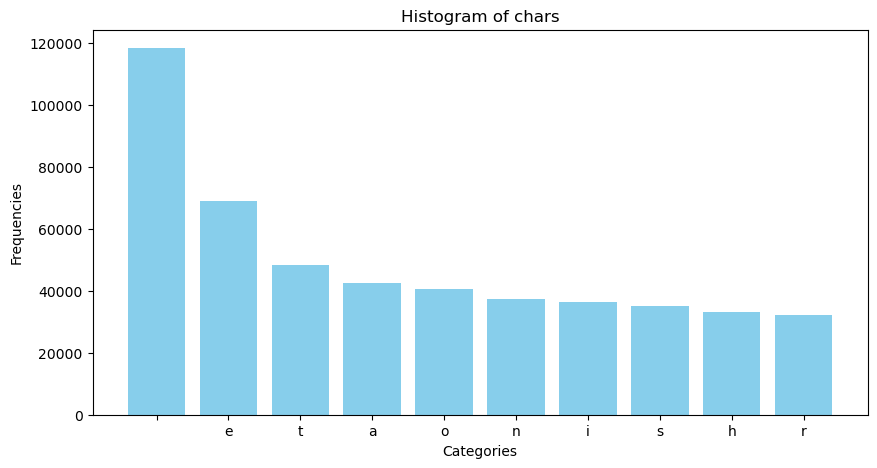

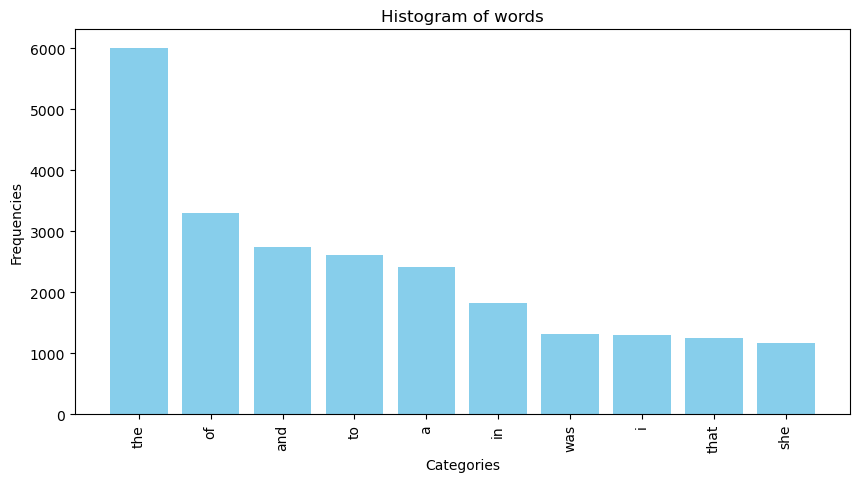

In [13]:
from plotting_utils import plot_histogram

# what we already have
def word_frequency(sentence):
    words = sentence.lower().split(' ')
    
    word_freq = {}
    for word in words:
        if word:
            word_freq[word] = 0
    
    for word in words:
        if word:
            word_freq[word] += 1
    
    return word_freq

def load_file(file_path):
    with open(file_path, 'r') as f:
        context = f.read()
    return context

def clean_text(text):
    # remove extra spaces
    context = load_file('book2.txt')
    context = ''.join(context.split('\n'*7)[11:-3])
    context = ''.join(context.split('\n'*3))
    context = ''.join(context.split('\n'*2))
    context = ' '.join(context.split('\n'))
    # split the text into sentences.
    return context.split('.')

# Solution:
def char_frequency(text):
    char_freq = {}
    for char in text:
        char_freq[char] = 0
    
    for char in text:
        char_freq[char] += 1
    
    return char_freq

# dictionary merging fuction
def merge_dict(dict1, dict2):
    if dict1 is None:
        return dict2
    elif dict2 is None:
        return dict1
    
    for key, value in dict2.items():
        if key in dict1:
            dict1[key] += value
        else:
            dict1[key] = value
    return dict1

# Test
context = load_file('book2.txt')
cleaned_sentences = clean_text(context)

char_dict = dict()
word_dict = dict()
for sentence in cleaned_sentences:
    char_dict_2 = char_frequency(sentence)
    char_dict = merge_dict(char_dict, char_dict_2)
    
    word_dict_2 = word_frequency(sentence)
    word_dict = merge_dict(word_dict, word_dict_2)

plot_histogram(char_dict, 'chars', top_k=10)
plot_histogram(word_dict, 'words', top_k=10)

### Regular Expressions



Let"s remember the palindrome first:

A [palindrome](https://en.wikipedia.org/wiki/Palindrome) is a word, number, phrase, or other sequence of symbols that reads the same backwards as forwards, such as madam or racecar, the date "22/02/2022" and the sentence: "A man, a plan, a canal – Panama." -- from Wikipedia

**Task:**

Improve the palindrome function to accept sentences. (hint: use regular expressions to filter)

In [4]:
# Palindrom function
# remember the string operations from earlier exercises
# regex will be quite usefull in filtering empty spaces and punctuation marks
import re


def is_palindrome(sentence: str) -> bool:
    # Remove non-alphanumeric characters and convert to lowercase
    clean_sentence = re.sub(r'[^a-zA-Z0-9]', '', sentence).lower()
    # Check if the cleaned sentence is a palindrome
    return clean_sentence == clean_sentence[::-1]

# Test the function
sentence = "A man, a plan, a canal – Panama"
print(is_palindrome(sentence))

True


<>:10: SyntaxWarning: invalid escape sequence '\.'
<>:10: SyntaxWarning: invalid escape sequence '\.'
C:\Users\anilosmantur\AppData\Local\Temp\ipykernel_25320\1115688424.py:10: SyntaxWarning: invalid escape sequence '\.'
  sentences = re.split("[\.\?!;:]", text)


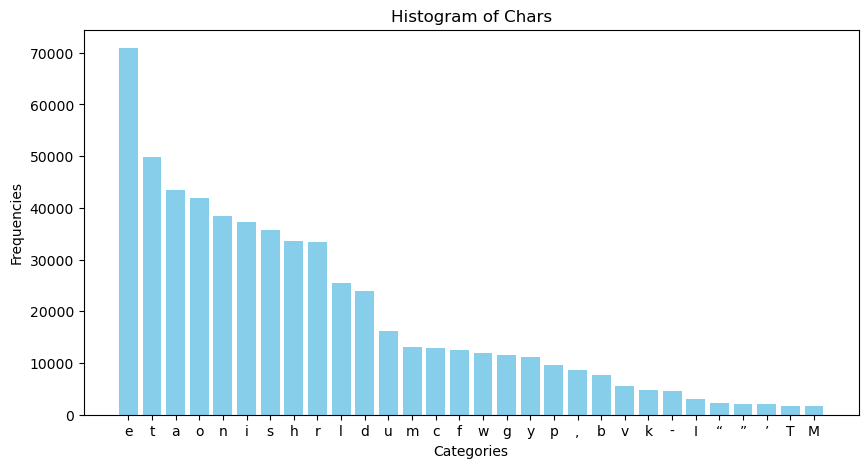

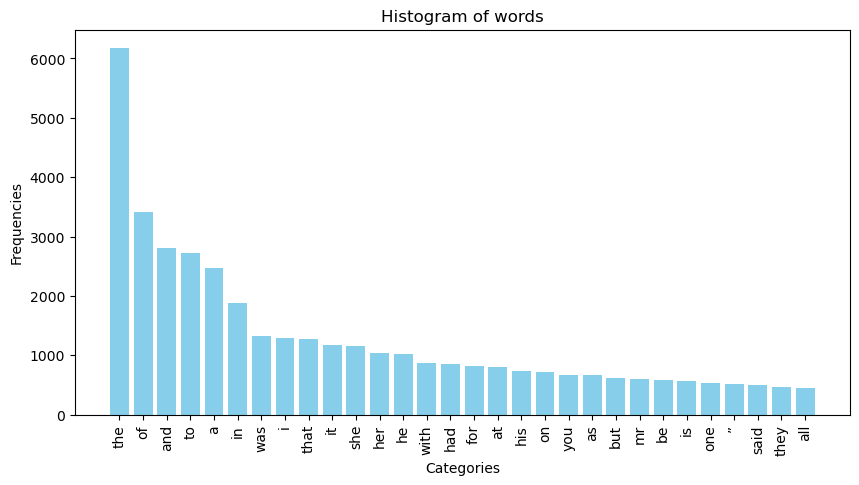

In [6]:
import re
from plotting_utils import plot_histogram

def clean_text(text):
    text = re.sub('[\n\t]', '', text)
    text = re.sub(' +', ' ', text)
    return text

def split_text(text):
    sentences = re.split("[\.\?!;:]", text)
    sentences = [i.strip() for i in sentences if i.strip()!='']
    return sentences

def read_book(file_path):
    with open(file_path,'r') as f:
        book = f.read()
    return book

def char_frequency(sentences: list) -> dict:
    # sentences is a list of strings
    text = ''.join(sentences).replace(' ', '')
    
    char_freq = {}
    for char in text:
        char_freq[char] = 0
    
    for char in text:
        char_freq[char] += 1
    
    return char_freq


def word_frequency(sentence: list) -> dict:
    words = ' '.join(sentence).lower().split(' ')    
    # Split text into words
    
    word_freq = {}
    for word in words:
        if word:
            word_freq[word] = 0
    
    for word in words:
        if word:
            word_freq[word] += 1
    
    return word_freq

# Test
text = read_book('book2.txt')
cleaned_text = clean_text(text)
sentences = split_text(cleaned_text)

# # Character frequency
char_freq = char_frequency(sentences)
plot_histogram(char_freq, 'Chars')

# # Word frequency
word_freq = word_frequency(sentences)
plot_histogram(word_freq, 'words')